In [1]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.util import ngrams
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
DF = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/badvideogames/youtube_comments__-sTlYUeT8o.csv")
DF

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=_-sTlYUeT8o,The Last of Us Part II - Angry Review,2020-07-02T02:32:07Z,@billarmaster,"the last of us is great, and joel it gets soft...",2024-11-05T19:57:30Z,1,1
1,https://www.youtube.com/watch?v=_-sTlYUeT8o,The Last of Us Part II - Angry Review,2020-07-02T02:32:07Z,@chris_player2995,30:03 Alex knew,2024-11-04T16:43:02Z,0,0
2,https://www.youtube.com/watch?v=_-sTlYUeT8o,The Last of Us Part II - Angry Review,2020-07-02T02:32:07Z,@bashcrash9148,18:27\n\nThe magic,2024-11-04T00:05:43Z,0,0
3,https://www.youtube.com/watch?v=_-sTlYUeT8o,The Last of Us Part II - Angry Review,2020-07-02T02:32:07Z,@pchtommy1268,21:42 That part was indeed really dissapointin...,2024-11-03T18:46:45Z,0,1
4,https://www.youtube.com/watch?v=_-sTlYUeT8o,The Last of Us Part II - Angry Review,2020-07-02T02:32:07Z,@Virileth,Abby having huge muscles makes no sense in an ...,2024-10-31T10:32:08Z,2,2
...,...,...,...,...,...,...,...,...
9995,https://www.youtube.com/watch?v=_-sTlYUeT8o,The Last of Us Part II - Angry Review,2020-07-02T02:32:07Z,@KevBoy3D,I think you just held the first game in too mu...,2020-07-04T21:13:23Z,0,0
9996,https://www.youtube.com/watch?v=_-sTlYUeT8o,The Last of Us Part II - Angry Review,2020-07-02T02:32:07Z,@DeyCallMeDrama,"Dude lose the jaded outdated Jacket, its not 2...",2020-07-04T21:07:53Z,2,1
9997,https://www.youtube.com/watch?v=_-sTlYUeT8o,The Last of Us Part II - Angry Review,2020-07-02T02:32:07Z,@therainenetwork3510,At 16:05 you can see Joe’s soul leave his body.,2020-07-04T21:05:13Z,0,0
9998,https://www.youtube.com/watch?v=_-sTlYUeT8o,The Last of Us Part II - Angry Review,2020-07-02T02:32:07Z,@nz7677,"I am honestly fine with Joel dying, but the wa...",2020-07-04T21:05:11Z,1,6


In [3]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['harry', 'potter', 'hogwarts','legacy',
    'like', 'take', 'studio', 'got', 'people', 'get', 
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review'
])

new_stopwords = set(stopwords.words('english'))
new_stopwords.update([
     'like', 'take', 'studio', 'got', 'people', 'get',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','video',"would","first","game","last","woke"
])
lmtzr = WordNetLemmatizer()

In [4]:
# Define reusable functions

def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, tokenizing, and filtering stopwords."""
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower().translate(str.maketrans('', '', string.punctuation)))
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) >= 3]
    return ' '.join(tokens)

def get_sentiment(text):
    """Classify sentiment of text as positive, negative, or neutral."""
    score = analyzer.polarity_scores(text)
    negative_words = ["suck", "sucks", "done", "worst", "hate", "disappointed", "disgusted","shit","dog shit", ]
    if any(word in text.lower() for word in negative_words):
        return 'negative'
    elif score['compound'] >= 0.01:
        return 'positive'
    elif score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

def text_processing(texts):
    """Further clean and tokenize text for topic modeling."""
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    texts = [[word for word in text.lower().split()] for text in texts]
    texts = [[lmtzr.lemmatize(word) for word in text if word not in new_stopwords and len(word) >= 3] for text in texts]
    return texts

def bigram_analysis(comments, top_n=30):
    """Generate bigrams from tokenized comments and plot the frequency distribution."""
    all_tokens = [word_tokenize(comment) for comment in comments]
    all_ngrams = [ngram for tokens in all_tokens for ngram in ngrams(tokens, 2)]
    freq_dist_ngrams = FreqDist(all_ngrams)
    
    # Convert to DataFrame and sort
    df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])
    df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)
    
    # Plot top n bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_ngrams['n-gram'][:top_n].apply(lambda x: ' '.join(x)),  
        df_ngrams['frequency'][:top_n]
    )
    plt.title(f'Top {top_n} Bigram Frequency Distribution')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    return df_ngrams

In [5]:
# Convert to datetime and extract only the date part
DF['releaseDate'] = pd.to_datetime(DF['releaseDate'].astype(str).str.replace('Z', '')).dt.date
DF['publishedTimeText'] = pd.to_datetime(DF['publishedTimeText'].astype(str).str.replace('Z', '')).dt.date

# Define the one-week period after the release date
release_date = DF['releaseDate'][0]
one_week_after_release = release_date + pd.DateOffset(weeks=1)
one_week_after_release = one_week_after_release.date()  # Convert to date format

# Filter for comments within the first week after the release date
df = DF[(DF['publishedTimeText'] >= release_date) & (DF['publishedTimeText'] <= one_week_after_release)]

# Select relevant columns and preprocess comments
df = df[['publishedTimeText', 'comment']]
df['processed_comments'] = df['comment'].apply(preprocess_text)

# Display the filtered DataFrame
df


,publishedTimeText,comment,processed_comments
7228,2020-07-09,This game let me down man.... That story hurt ...,game let man story hurt loved first game joel ...
7229,2020-07-09,I have watched this review so many times Joe.....,watched many time joe say masterpiece
7230,2020-07-09,She looks like greta: HOW DARE YOU!!!,look greta dare
7231,2020-07-09,A woman who manages to unrealistically stay th...,woman manages unrealistically stay fit post ap...
7232,2020-07-09,4/10.,410
...,...,...,...
9995,2020-07-04,I think you just held the first game in too mu...,held first game regard reason must clicked one...
9996,2020-07-04,"Dude lose the jaded outdated Jacket, its not 2...",dude lose jaded outdated jacket 2010 anymore noob
9997,2020-07-04,At 16:05 you can see Joe’s soul leave his body.,1605 see joe soul leave body
9998,2020-07-04,"I am honestly fine with Joel dying, but the wa...",honestly fine joel dying went character poorly...


In [6]:
# Randomly sample 500 rows with a fixed random_state for reproducibility
df = df.sample(n=500, random_state=0).reset_index(drop=True)  # Use any integer as the random_state

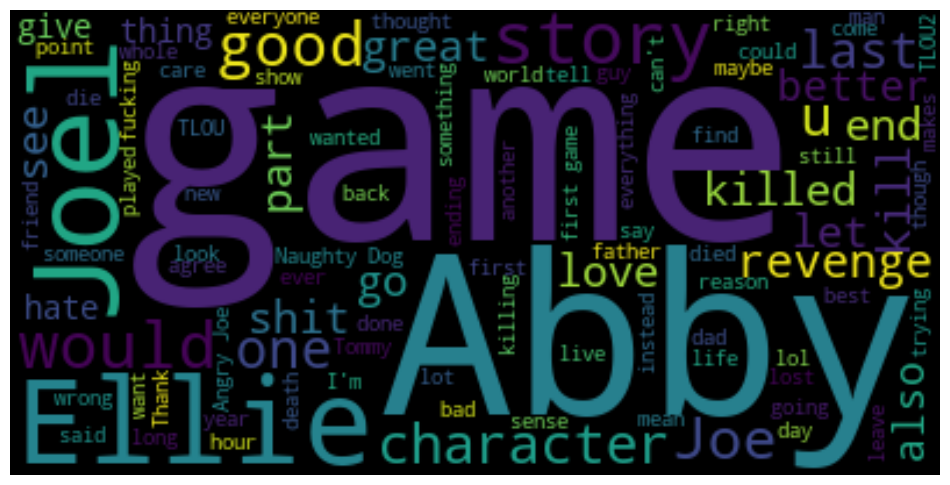

In [7]:
# WordCloud Visualization
word_cloud_text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['processed_comments'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f'The video has mostly {most_common_sentiment} comments.')
df



The video has mostly negative comments.


,publishedTimeText,comment,processed_comments,sentiment
0,2020-07-07,Joe your content is emblematic of the best of ...,joe content emblematic best youtube great back...,negative
1,2020-07-05,"17:35 ""HEY HEY WO!! HEY HEY NO!!"" The reaction...",1735 hey hey hey hey reaction million,neutral
2,2020-07-05,"""Nearly an hour long"". Got my popcorn ready :)",nearly hour long popcorn ready,positive
3,2020-07-07,No one mentions even though that's the main th...,one mention though thats main theme videogame ...,negative
4,2020-07-08,Erm just want to say Ellie actually has the be...,erm want say ellie better weapon abby doesnt t...,negative
...,...,...,...,...
495,2020-07-06,10:00 lmao! That's how I'd play this game if I...,1000 lmao thats game ever decided throw money ...,positive
496,2020-07-07,This review makes me think Joe: has zero conce...,make joe zero concept subtext think character ...,negative
497,2020-07-04,Btw... Why does Abbie have arms like Dwayne Jo...,btw abbie arm dwayne johnson,neutral
498,2020-07-06,Love the review. Having watched every single r...,love watched every single say write storyscrip...,positive


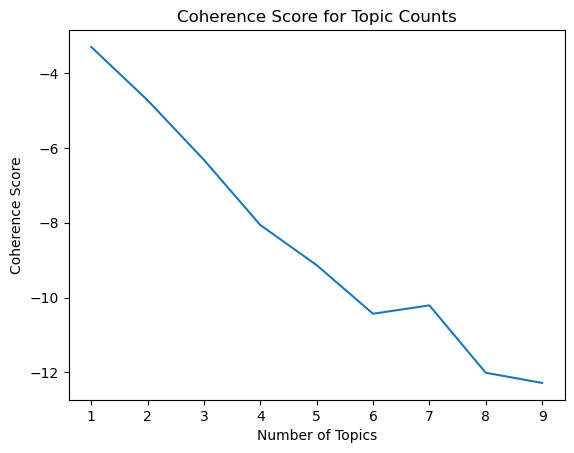

In [9]:
# Topic Modeling
data = text_processing(df['processed_comments'].values.tolist())
dictionary = Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Coherence Analysis for Topic Modeling
np.random.seed(1)
k_range = range(1, 10)
scores = []
for k in k_range:
    lda_model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Topic Counts")
plt.show()


In [10]:
# Final LDA Model with Optimal Number of Topics
optimal_k = 1
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=optimal_k, passes=20)
print(model.show_topics())

[(0, '0.003*"abby" + 0.003*"joe" + 0.003*"joel" + 0.002*"ellie" + 0.002*"good" + 0.002*"story" + 0.002*"one" + 0.002*"part" + 0.002*"better" + 0.002*"great"')]


1 topic has the highest coherence score, which suggests that this may be the optimal choice for maximizing coherence.
we also have one major topic in the biagrams, so 1 is fine.

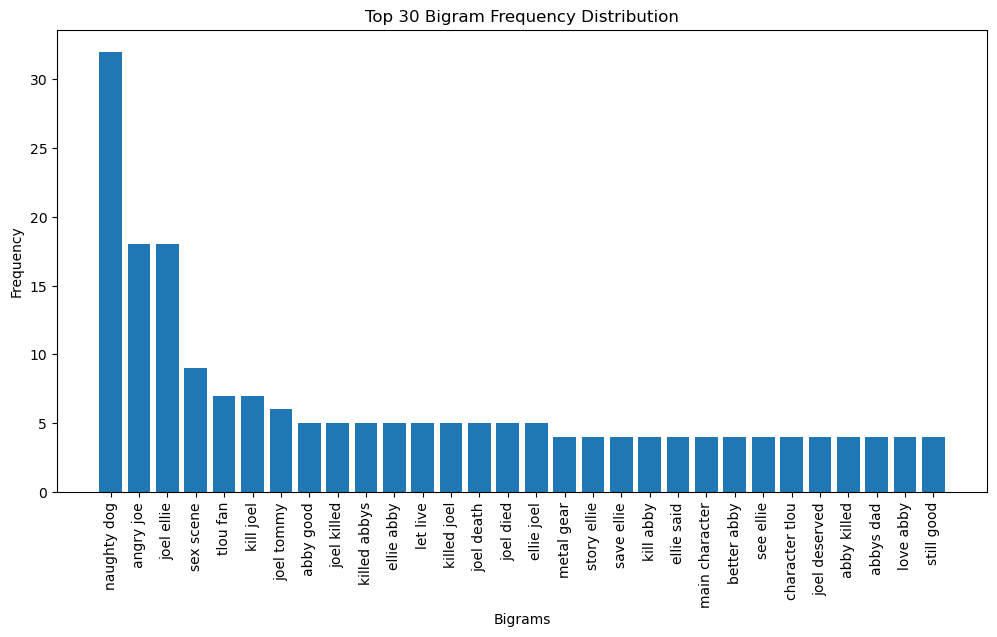

In [12]:
data_as_strings = [' '.join(tokens) for tokens in data]
df_ngrams = bigram_analysis(data_as_strings)

In [13]:
#Load the existing df_topics CSV file
title=DF['title'].unique()
file_path = r'C:/Users/giulia macis/Desktop/UBISOFT/df_bad_topics.csv'
df_bad_topics = pd.read_csv(file_path)
#Append the new row to the DataFrame
new_row = pd.DataFrame({'title': title, 'num_topics': optimal_k})
df_bad_topics = pd.concat([df_bad_topics, new_row], ignore_index=True)
# Save the updated DataFrame back to the CSV file
df_bad_topics.to_csv(file_path, index=False)
df_bad_topics

,title,num_topics
0,The Last of Us Part II - Angry Review,1
